<Figure size 640x480 with 0 Axes>

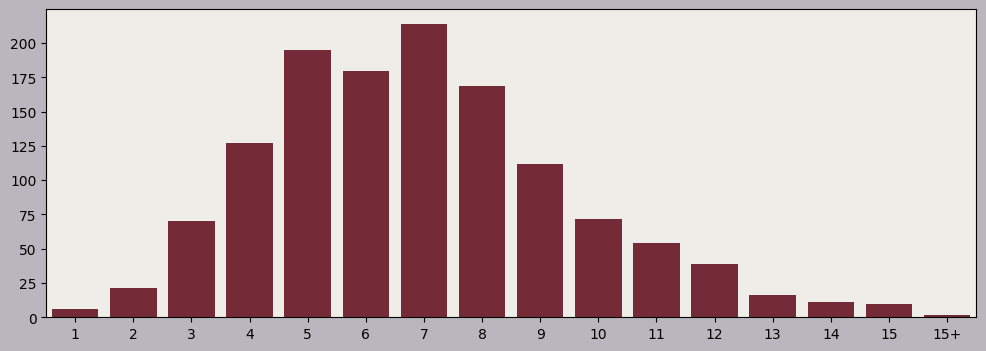

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import pandas as pd
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
np.random.seed(42)

# creating a distribution of chef counts based on their experience
hist, bins, _ = plt.hist(np.random.lognormal(mean=0, sigma=0.2, size=1300), bins=21) # I took 21 'years', to avoid heavy tail
plt.clf()

chefs_counts = {} # to get values of experience
for i in range(16):
    chefs_counts[i + 1] = hist[i] # hist separated via columns
copy_chefs_counts = chefs_counts.copy() # copy for vizualisation where instead of 16 will be 15+
copy_chefs_counts['15+'] = copy_chefs_counts.pop(16)

fig, ax = plt.subplots(figsize=(12, 4), facecolor = '#B9B7BD')
sns.barplot(x = list(copy_chefs_counts.keys()), y = list(copy_chefs_counts.values()),color = '#821D30')
ax.set_facecolor("#EEEDE7")

In [20]:
keys, values = list(chefs_counts.keys()),list(chefs_counts.values())
df = pd.DataFrame({'year': keys, 'amount': values})

# I have year and amount of cooks who has this year of experement, and i extend dataframe
df = df.loc[df.index.repeat(df['amount'])] # let's say year == 3 and I have 78 cooks, I multiply year string 78 times
df = df.reset_index(drop=True)
df.drop('amount', axis = 1, inplace = True) # no need anymore

# the range of average values for 1 - 8 years of experience, low and top points
first_8_down, first_8_up = np.linspace(0.95, 1.26, 8), np.linspace(1.02, 1.26, 8)

# and after 8 years, it might goes down and up
second_down, second_up = np.linspace(1.22, 1.05, 8), np.linspace(1.26,1.43,8)

for index, row in df.iterrows(): 
    if row['year'] in range(1,9): # I plan the average go up gradually 
        i = row['year'] - 1 
        df.loc[index, 'average'] = np.random.uniform(first_8_down[i] * np.random.uniform(0.95, 1.05), first_8_up[i] * \
            np.random.uniform(1.07, 1.11))
        
    else: # the same points as < 8 but it might goes up or down as well
        i = row['year'] -9
        df.loc[index, 'average'] = np.random.uniform(second_down[i] * 0.95, second_up[i]* 1.11)

Text(0.5, 0, 'years of experience')

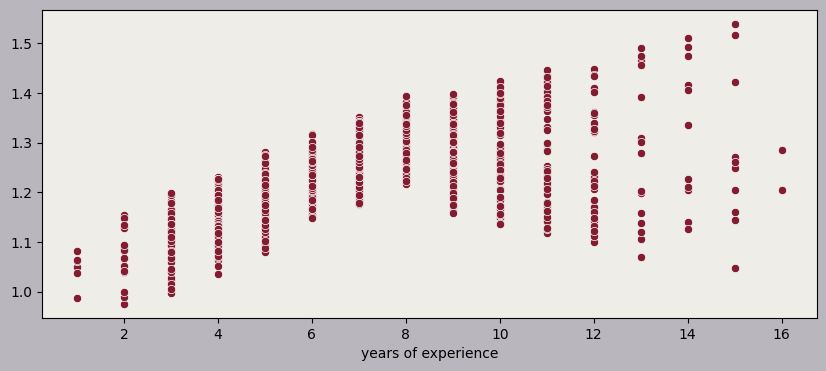

In [21]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor = '#B9B7BD')
sns.scatterplot(df, x = 'year', y = 'average',color = '#821D30')
ax.set_facecolor("#EEEDE7")
ax.set_ylabel('')
ax.set_xlabel('years of experience')

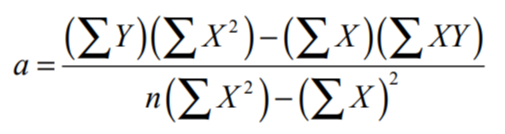 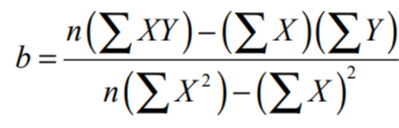

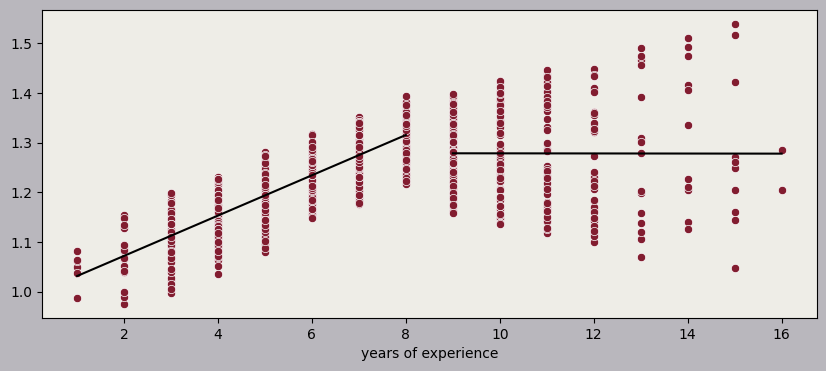

In [22]:
# separate into 2 data, < 9 and > 8
df_new_1_8 = df[df['year']<9]
df_new_8_9 = df[df['year']>8]

# calculations for formulas
y_sum_1, x_2_sum_1 = df_new_1_8['average'].sum(), (df_new_1_8['year']**2).sum()
x_sum_1,xy_1 = df_new_1_8['year'].sum(), (df_new_1_8['year']*df_new_1_8['average']).sum()
y_sum_2, x_2_sum_2 = df_new_8_9['average'].sum(), (df_new_8_9['year']**2).sum()
x_sum_2,xy_2 = df_new_8_9['year'].sum(), (df_new_8_9['year']*df_new_8_9['average']).sum()

# calculations of coef of regression line where a is b :) and where b is k, and eventualy I have y = kx + b
b_koef_1 = round((y_sum_1 * x_2_sum_1 - x_sum_1 * xy_1)/ (len(df_new_1_8) * x_2_sum_1 - x_sum_1**2),4)
k_koef_1 = round((len(df_new_1_8) * xy_1 - y_sum_1 * x_sum_1)/ (len(df_new_1_8) * x_2_sum_1 - x_sum_1**2), 4)
b_koef_2 = round((y_sum_2 * x_2_sum_2 - x_sum_2 * xy_2)/ (len(df_new_8_9) * x_2_sum_2 - x_sum_2**2),4)
k_koef_2 = round((len(df_new_8_9) * xy_2 - y_sum_2 * x_sum_2)/ (len(df_new_8_9) * x_2_sum_2 - x_sum_2**2), 4)

# plotting all data
fig, ax = plt.subplots(figsize=(10, 4), facecolor = '#B9B7BD')
sns.scatterplot(df, x = 'year', y = 'average',color = '#821D30')
ax.set_facecolor("#EEEDE7")
ax.set_ylabel('')
ax.set_xlabel('years of experience')

# regression line for years 1-8 
x_1_8 = np.linspace(1,8,100)
y_1_8 = k_koef_1* x_1_8 + b_koef_1
plt.plot(x_1_8,y_1_8, color = 'black')

# regression line for years 8-16
x_8_16 = np.linspace(9,16,100)
y_8_16 = k_koef_2* x_1_8 + b_koef_2
plt.plot(x_8_16,y_8_16, color = 'black')


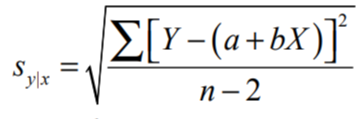 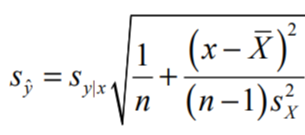 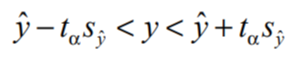

In [23]:
# to generate intervals
lis_for_reg_1_8 = [] # there will be list of tuples for liw and high lines
lis_for_reg_8_16 = []
for i in range(1,9):
    # calculate total deviation for regression line, first formula
    s_total = ((((df_new_1_8[df_new_1_8['year'] == i]['average'] -(b_koef_1 + k_koef_1 * i ))**2).sum() )/(len(df_new_1_8) -2 ))**0.5
    # the deviation y coordinate for specific x (years)
    s_y = 1/len(df_new_1_8) + ((i - round(df_new_1_8['year'].mean(), 2))**2) /((len(df_new_1_8) - 1)* (df_new_1_8['year'].var()))
    # value on regression line (predicted)
    y = k_koef_1 * i + b_koef_1
    # calculation of intervals +- from regression line third formula t for 5% of error == 1.96
    y_final_down, y_final_up = round(y - 1.96 * s_total, 4), round(y + 1.96 * s_total, 4)
    # put to list as tuple
    lis_for_reg_1_8.append((y_final_down, y_final_up))
for i in range(9,17): # the same fro 9-16 interval
    s_total = ((((df_new_8_9[df_new_8_9['year'] == i]['average'] -(b_koef_2 + k_koef_2 * i ))**2).sum() )/(len(df_new_8_9) -2 ))**0.5
    s_y = 1/len(df_new_8_9) + ((i - round(df_new_8_9['year'].mean(), 2))**2) /((len(df_new_8_9) - 1)* (df_new_8_9['year'].var()))
    y = k_koef_2 * i + b_koef_2
    y_final_down, y_final_up = round(y - 1.96 * s_total, 4), round(y + 1.96 * s_total, 4)
    lis_for_reg_8_16.append((y_final_down, y_final_up))

Text(0.5, 1.0, '95 % that average line is between those lines')

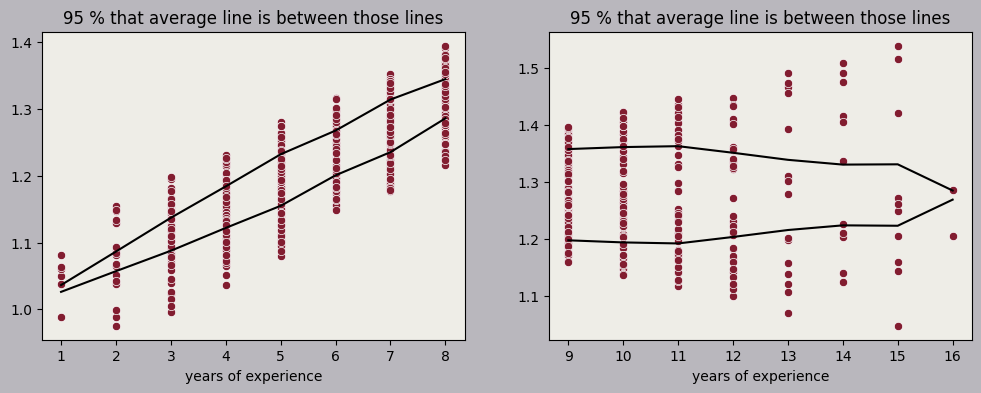

In [24]:
# lists for vizualisation
low_line_1 = []
up_line_1 = []
low_line_2 = []
up_line_2 = []

# taking valuses from tuples
for i in range(8):
    low_line_1.append(lis_for_reg_1_8[i][0])
    up_line_1.append(lis_for_reg_1_8[i][1])
x_1_8_ = np.linspace(1,8,8) # generate x line for vizualisation

for i in range(9,17):
    low_line_2.append(lis_for_reg_8_16[i-9][0])
    up_line_2.append(lis_for_reg_8_16[i-9][1])
x_8_16_ = np.linspace(9,16,8)

# vizualisation of intervals, varience of error of regression line
fig, ax = plt.subplots(1,2,figsize=(12, 4), facecolor = '#B9B7BD')
sns.scatterplot(df_new_1_8, x = 'year', y = 'average',color = '#821D30', ax = ax[0]) # for 1-8 years
ax[0].plot(x_1_8_, low_line_1, color = 'black')
ax[0].plot(x_1_8_, up_line_1, color = 'black')
ax[0].set_facecolor("#EEEDE7")
ax[0].set_ylabel('')
ax[0].set_xlabel('years of experience')
ax[0].set_title('95 % that average line is between those lines')

sns.scatterplot(df_new_8_9, x = 'year', y = 'average',color = '#821D30', ax = ax[1]) # for 9-16 years
ax[1].plot(x_8_16_, low_line_2, color = 'black')
ax[1].plot(x_8_16_, up_line_2, color = 'black')
ax[1].set_facecolor("#EEEDE7")
ax[1].set_ylabel('')
ax[1].set_xlabel('years of experience')
ax[1].set_title('95 % that average line is between those lines')



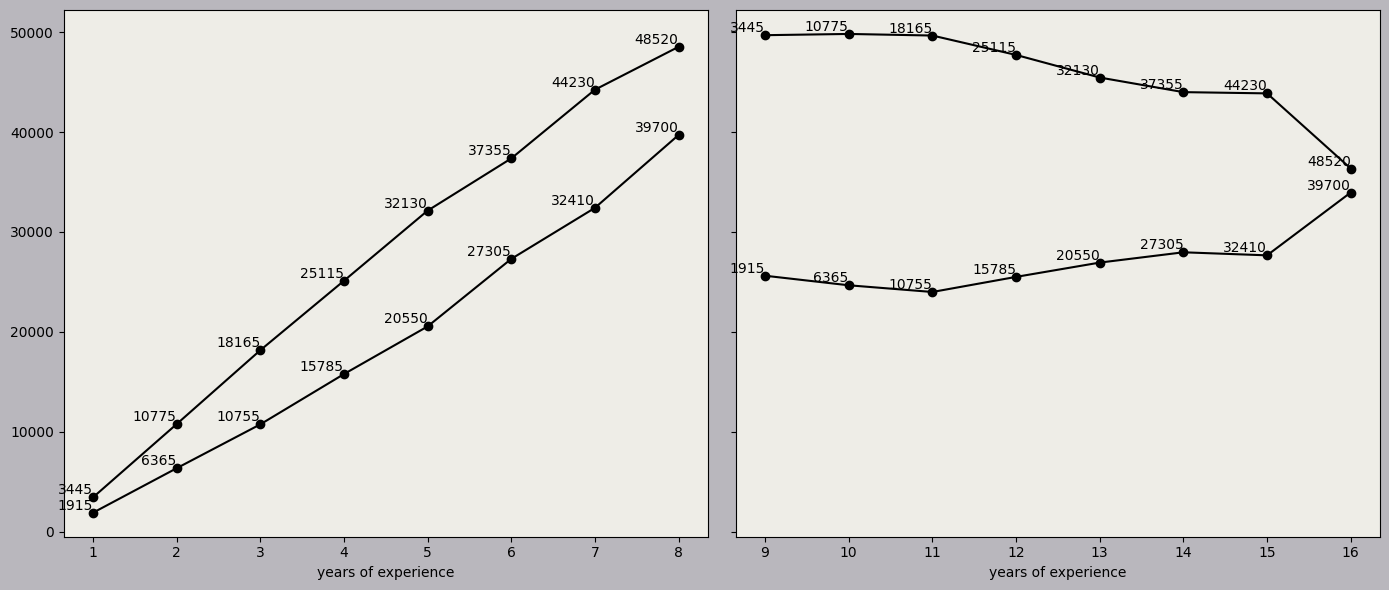

In [25]:
# aproapproximately avarage salary of cooks for their expirience 
salary_of_chef_1_8 = [2000,2200, 2400, 2500, 2700, 2800, 2900, 3200]
salary_of_chef_8_16 = [x * 2 for x in salary_of_chef_1_8]

# creating intervals for vizualisatons, how useful cook
points_dow_1 = [] # down interval
points_up_1 = [] # upper interval
points_dow_2 = [] 
points_up_2 = []

for i in range(1,9): # cooks increases income - his salary - month income, how reasonable his work in money
    sum_plus_down_1 = round((150000 * low_line_1[i-1] - salary_of_chef_1_8[i-1])- 150000) # money in low level
    sum_plus_up_1 = round((150000 * up_line_1[i-1] - salary_of_chef_1_8[i-1])- 150000) # and in top level 
    points_dow_1.append(sum_plus_down_1) # eventualy I got range from this point - 
    points_up_1.append(sum_plus_up_1) # - to this point, it's just range of possible values
for i in range(9,17):
    sum_plus_down_2 = round((150000 * low_line_2[i-9] - salary_of_chef_8_16[i-9])- 150000)
    sum_plus_up_2 = round((150000 * up_line_2[i-9] - salary_of_chef_8_16[i-9])- 150000)
    points_dow_2.append(sum_plus_down_2)
    points_up_2.append(sum_plus_up_2)
   
x_for_1 = list(range(1,9)) # x axes
fig, ax = plt.subplots(1,2,figsize=(14, 6), facecolor = '#B9B7BD', sharey=True)
ax[0].plot(x_for_1,points_dow_1,marker='o', color = 'black')
ax[0].plot(x_for_1,points_up_1,marker='o', color = 'black')
for i, txt in enumerate(points_dow_1): # just to give number for every point
    ax[0].text(x_for_1[i], points_dow_1[i], f'{txt}', ha='right', va='bottom')
for i, txt in enumerate(points_up_1):
    ax[0].text(x_for_1[i], points_up_1[i], f'{txt}', ha='right', va='bottom')
ax[0].set_facecolor("#EEEDE7")
ax[0].set_xlabel('years of experience')

x_for_2 = list(range(9,17))
ax[1].plot(x_for_2,points_dow_2,marker='o', color = 'black')
ax[1].plot(x_for_2,points_up_2,marker='o', color = 'black')
ax[1].set_facecolor("#EEEDE7")
ax[1].set_xlabel('years of experience')
for i, txt in enumerate(points_dow_1):
    ax[1].text(x_for_2[i], points_dow_2[i], f'{txt}', ha='right', va='bottom')
for i, txt in enumerate(points_up_1):
    ax[1].text(x_for_2[i], points_up_2[i], f'{txt}', ha='right', va='bottom')
plt.tight_layout()

In [26]:
for i in range(8):
    print('Avarage chef has {} years of experience with {} EUR of salary might bring from {} to {} EUR extra money from avarage income'.format(i+1,\
        salary_of_chef_1_8[i],points_dow_1[i], points_up_1[i]))

Avarage chef has 1 years of experience with 2000 EUR of salary might bring from 1915 to 3445 EUR extra money from avarage income
Avarage chef has 2 years of experience with 2200 EUR of salary might bring from 6365 to 10775 EUR extra money from avarage income
Avarage chef has 3 years of experience with 2400 EUR of salary might bring from 10755 to 18165 EUR extra money from avarage income
Avarage chef has 4 years of experience with 2500 EUR of salary might bring from 15785 to 25115 EUR extra money from avarage income
Avarage chef has 5 years of experience with 2700 EUR of salary might bring from 20550 to 32130 EUR extra money from avarage income
Avarage chef has 6 years of experience with 2800 EUR of salary might bring from 27305 to 37355 EUR extra money from avarage income
Avarage chef has 7 years of experience with 2900 EUR of salary might bring from 32410 to 44230 EUR extra money from avarage income
Avarage chef has 8 years of experience with 3200 EUR of salary might bring from 39700 

In [27]:
for i in range(9,17):
    print('Avarage chef has {} years of experience with {} EUR of salary might bring from {} to {} EUR extra money from avarage income'.format(i,\
        salary_of_chef_8_16[i - 9],points_dow_2[i-9], points_up_2[i-9]))

Avarage chef has 9 years of experience with 4000 EUR of salary might bring from 25625 to 49685 EUR extra money from avarage income
Avarage chef has 10 years of experience with 4400 EUR of salary might bring from 24670 to 49810 EUR extra money from avarage income
Avarage chef has 11 years of experience with 4800 EUR of salary might bring from 24000 to 49650 EUR extra money from avarage income
Avarage chef has 12 years of experience with 5000 EUR of salary might bring from 25510 to 47710 EUR extra money from avarage income
Avarage chef has 13 years of experience with 5400 EUR of salary might bring from 26940 to 45450 EUR extra money from avarage income
Avarage chef has 14 years of experience with 5600 EUR of salary might bring from 27970 to 43990 EUR extra money from avarage income
Avarage chef has 15 years of experience with 5800 EUR of salary might bring from 27665 to 43865 EUR extra money from avarage income
Avarage chef has 16 years of experience with 6400 EUR of salary might bring f